Trying to reproduce the following code in R with Python:

```
> mod = lm(Sepal.Length ~ Petal.Width, iris)
> summary(mod)

Call:
lm(formula = Sepal.Length ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max
-1.38822 -0.29358 -0.04393  0.26429  1.34521

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.77763    0.07293   65.51   <2e-16 ***
Petal.Width  0.88858    0.05137   17.30   <2e-16 ***
---
Signif. codes:  
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.478 on 148 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6668
F-statistic: 299.2 on 1 and 148 DF,  p-value: < 2.2e-16

> new <- data.frame(Petal.Width = c(3))
> predict(mod, new, interval = 'confidence')
      fit      lwr      upr
1 7.44337 7.244962 7.641778
```

The plotting part of the file was extracted from [this seaborn package online doc](https://seaborn.pydata.org/tutorial/regression.html).

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [ ]:
isinstance(data, pd.DataFrame)

True

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data[['sepal length (cm)', 'petal width (cm)']]

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [ ]:
x = data[['petal width (cm)']]
y = data[['sepal length (cm)']]

In [ ]:
reg = LinearRegression().fit(x, y)

In [ ]:
reg.coef_

array([[0.88858025]])

In [ ]:
reg.intercept_

array([4.77762942])

In [ ]:
reg.score(x, y)

0.6690276860464137

In [ ]:
reg.predict(np.array([[3]]))

array([[7.44337018]])

In [ ]:
import seaborn as sns

In [ ]:
sns.set(color_codes=True)

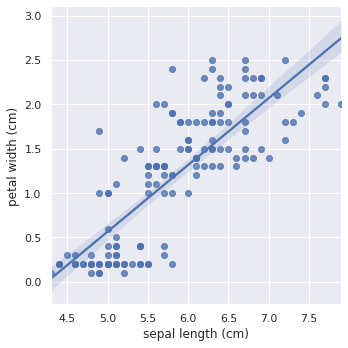

In [ ]:
sns.lmplot(x='sepal length (cm)', y='petal width (cm)', data=data)

Here is an example with another dataset:

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
isinstance(tips, pd.DataFrame)

True

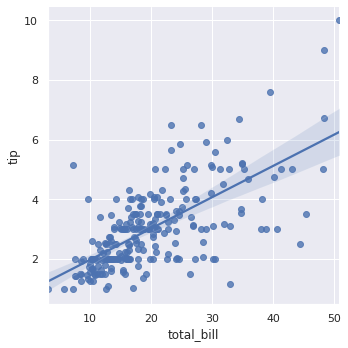

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips)

Multivariable regression:

In [ ]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/RInterested/datasets/gh-pages/mtcars.csv"
contents = requests.get(url).content
df = pd.read_csv(io.StringIO(contents.decode('utf-8')))

df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


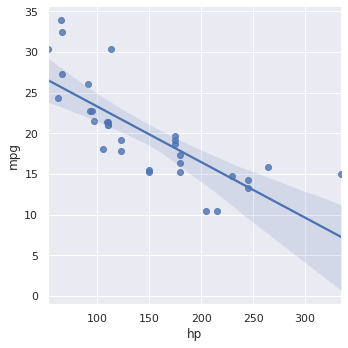

In [ ]:
sns.lmplot(x='hp', y='mpg', data = df)

In [ ]:
x = df[['hp']]
y = df[['mpg']]
reg = LinearRegression().fit(x, y)
display(reg.coef_, reg.intercept_, reg.score(x,y))

array([[-0.06822828]])

array([30.09886054])

0.602437341423934

In [ ]:
x = df[['hp', 'disp']]
y = df['mpg']
reg = LinearRegression().fit(x, y)
display(reg.coef_, reg.intercept_, reg.score(x,y))

array([-0.02484008, -0.03034628])

30.735904248315897

0.7482401820617401

Compare to:


```
> mod = lm(mpg~ hp + disp, mtcars)
> summary(mod)

Call:
lm(formula = mpg ~ hp + disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max
-4.7945 -2.3036 -0.8246  1.8582  6.9363

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.735904   1.331566  23.083  < 2e-16 ***
hp          -0.024840   0.013385  -1.856 0.073679 .  
disp        -0.030346   0.007405  -4.098 0.000306 ***
---
Signif. codes:  
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.127 on 29 degrees of freedom
Multiple R-squared:  0.7482,	Adjusted R-squared:  0.7309
F-statistic: 43.09 on 2 and 29 DF,  p-value: 2.062e-09
```

In [ ]:
reg.predict(np.array([[3, 5]]))

array([30.50965262])